In [1]:
import sys
#sys.path.insert(0, dir_notebook)

from my_units import *
from functions_model import * 
from functions_load import *
from functions_yellin import *
from functions_likelihood import *

i_mock_str = '6'
i_m_str = '90'

i_mock = int(i_mock_str) # mock file number
i_m = int(i_m_str) # axion mass integer
print('i_mock =',str(i_mock),'| i_m =',str(i_m))

i_mock = 6 | i_m = 90


In [2]:
dir_home = '/mnt/home/kvantilburg/'
dir_ceph = dir_home+'ceph/luminous-basin/'
dir_events = dir_ceph+'mocks/event_lists/'
dir_source = dir_ceph+'data/products_80610202001_orbit1_chu12_spatialARF/'
dir_production = dir_ceph+'data/production/'
dir_background = dir_home+'/luminous-basin/data/backgrounds/'
dir_res = dir_ceph+'results/mocks/mock_'+str(i_mock)+'/'


dir_proj = dir_ceph+'results/mocks/mock_'+str(i_mock)+'/proj/'

file_rho0 = dir_proj+'rho0_'+str(i_mock)+'_'+str(i_m)+'_fid.csv'
file_proj = dir_proj+'proj_'+str(i_mock)+'_'+str(i_m)+'_fid.csv'

# time intervals [seconds]
good_time_ints = np.asarray([
    [3.37603341e+08, 3.376033795e+08],
    [3.376036305e+08, 3.3760522972e+08]
])
exposure = np.sum([interval[1]-interval[0] for interval in good_time_ints])
livetime = np.asarray([1501.16599845754, 1481.86081041239])/exposure # effective fractional livetime of A and B
duration = np.max(good_time_ints)- np.min(good_time_ints)
# time bins
N_bins_t = 10
bins_t = np.linspace(good_time_ints[0][0], good_time_ints[-1][1], N_bins_t+1)

# energy bins [units = keV]
sigma_E = 0.166 # energy resolution [keV]
n_sigma_E = 3
width_E = 0.04 # energy bin width is 40 keV
bins_E = np.arange(1.6,200.01,width_E)
list_m = np.arange(3,40,0.1)
m = list_m[i_m]  # axion mass [keV]

# fiducial solar position 
ra_sun_fid = 170.66855149 * degree
dec_sun_fid = 4.02092024 * degree
# error on solar position 
sigma_sun = 2 * arcmin
# shift in solar position over duration starting from t_min
delta_ra_sun = 0.01962028 * degree
delta_dec_sun = -0.00835105 * degree
t_min = 3.37603341e+08
sigma_sun = 2*arcmin # error on solar position

# initial solar position
ra_sun_0 = ra_sun_fid
dec_sun_0 = dec_sun_fid

list_file_events = np.sort([dir_events+file for file in listdir(dir_events) if file[0:len(str(i_mock))+1]==str(i_mock)+'_'])
file_box_centers = dir_source+'box_centers.txt'
list_file_arf = [dir_source+'arfs/'+file for file in listdir(dir_source+'arfs/')]

In [3]:
##### load data #####
print('m = '+str(m)[0:8]+': initialized, loading data...')

df_data = load_data(m,sigma_E,good_time_ints,livetime,bins_t,bins_E,n_sigma_E,list_file_events,file_box_centers,list_file_arf)
t = df_data['t'].to_numpy()
E = df_data['E'].to_numpy()
ra = df_data['ra'].to_numpy()
dec = df_data['dec'].to_numpy()
exp = df_data['exp'].to_numpy()
arf = df_data['arf'].to_numpy()
eps = exp * arf * (df_data['Omega'].to_numpy() * arcmin**2 / (degree**2)) * width_E
counts = df_data['counts'].to_numpy()
df_data

m = 12.00000: initialized, loading data...


,detector,idx_t,idx_E,i1,i2,t,E,ra,dec,exp,arf,Omega,counts
0,A,0,98,-6,-6,3.376033e+08,5.52,170.889,3.75981,35.289849,95.165726,1.0,0
1,A,0,98,-6,-5,3.376033e+08,5.52,170.881,3.77425,35.289849,69.458748,1.0,0
2,A,0,98,-6,-4,3.376033e+08,5.52,170.872,3.78868,35.289849,115.135124,1.0,0
3,A,0,98,-6,-3,3.376033e+08,5.52,170.864,3.80311,35.289849,113.366455,1.0,0
4,A,0,98,-6,-2,3.376033e+08,5.52,170.856,3.81755,35.289849,198.479553,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84495,B,9,122,6,2,3.376050e+08,6.48,171.009,3.97187,170.897354,123.258812,1.0,0
84496,B,9,122,6,3,3.376050e+08,6.48,171.001,3.98630,170.897354,100.964233,1.0,0
84497,B,9,122,6,4,3.376050e+08,6.48,170.992,4.00073,170.897354,72.868217,1.0,0
84498,B,9,122,6,5,3.376050e+08,6.48,170.984,4.01517,170.897354,71.371933,1.0,0


In [4]:
df_data_not_m = load_data_not_m(m,sigma_E,good_time_ints,livetime,bins_t,bins_E,n_sigma_E,list_file_events,file_box_centers,list_file_arf)
E_not_m = df_data_not_m['E'].to_numpy()
exp_not_m = df_data_not_m['exp'].to_numpy()
counts_not_m = df_data_not_m['counts'].to_numpy()
df_data_not_m

,detector,idx_E,E,exp,counts
35,A,35,3.00,1501.165998,61
36,A,36,3.04,1501.165998,63
37,A,37,3.08,1501.165998,57
38,A,38,3.12,1501.165998,60
39,A,39,3.16,1501.165998,55
...,...,...,...,...,...
9917,B,4956,199.84,1481.860810,0
9918,B,4957,199.88,1481.860810,0
9919,B,4958,199.92,1481.860810,0
9920,B,4959,199.96,1481.860810,0


In [5]:
file_results = dir_res+'results_k10_'+str(i_mock)+'_fid.csv'
df_results = pd.read_csv(file_results)
df_results

,m,ra_sun_0,dec_sun_0,rho_0,N_data,N_sig_lim_poisson,S_0_lim_poisson,N_sig_lim_yellin,S_0_lim_yellin
0,5.1,2.978728,0.070178,46.075331,10396,10526.408574,228.460835,6766.408024,146.855332
1,5.2,2.978728,0.070178,131.077967,9540,9665.845575,73.741192,6704.554590,51.149364
2,5.3,2.978728,0.070178,305.565489,8666,8786.166682,28.753793,6213.480164,20.334365
3,5.4,2.978728,0.070178,628.920575,6729,6835.312074,10.868323,4326.577196,6.879370
4,5.5,2.978728,0.070178,1205.907263,5960,6059.514435,5.024859,2752.752548,2.282723
...,...,...,...,...,...,...,...,...,...
344,39.5,2.978728,0.070178,25233.482328,10,15.406070,0.000611,2.570988,0.000102
345,39.6,2.978728,0.070178,25148.565663,10,15.406070,0.000613,2.570988,0.000102
346,39.7,2.978728,0.070178,25060.846940,11,16.596335,0.000662,2.686581,0.000107
347,39.8,2.978728,0.070178,24931.713987,10,15.406070,0.000618,2.570988,0.000103


In [6]:
idx_m = np.where(np.abs(df_results['m']-m)<width_E/4)[0][0]
S0_guess = df_results['S_0_lim_poisson'][idx_m]
print('S0_guess = '+str(S0_guess)+' sec^{-1} degree^{-2} cm^{-2}')

S0_guess = 0.2109281793332222 sec^{-1} degree^{-2} cm^{-2}


In [7]:
df_background = pd.read_csv(dir_background+'backgrounds.txt',delimiter=" ",skiprows=3,header=None)
df_background.columns = ["Energy [keV]","unknown","Total", "aCXB", "Internal","fXCB","Continuum"]
df_background

,Energy [keV],unknown,Total,aCXB,Internal,fXCB,Continuum
0,1.620000,0.020000,0.000185,3.594298e-05,1.808465e-06,0.000003,0.000144
1,1.660000,0.020000,0.000194,4.424206e-05,2.023978e-06,0.000003,0.000144
2,1.700000,0.020000,0.000204,5.304552e-05,2.230286e-06,0.000004,0.000145
3,1.740000,0.020000,0.000214,6.219269e-05,2.424499e-06,0.000004,0.000145
4,1.780000,0.020000,0.000225,7.193359e-05,2.609324e-06,0.000005,0.000145
...,...,...,...,...,...,...,...
4091,165.260010,0.019997,0.000229,2.040408e-08,9.147808e-08,0.000000,0.000229
4092,165.300003,0.020004,0.000229,1.926954e-08,8.636118e-08,0.000000,0.000229
4093,165.339996,0.019997,0.000229,1.805362e-08,8.088239e-08,0.000000,0.000229
4094,165.380005,0.019997,0.000229,1.691932e-08,7.578295e-08,0.000000,0.000229


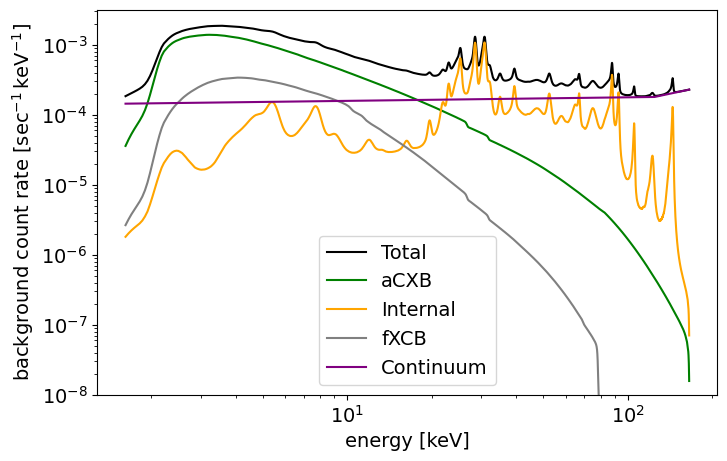

In [8]:
fig,ax = plt.subplots(1,1,figsize=(8,5))
ax.plot(df_background['Energy [keV]'].to_numpy(),df_background['Total'].to_numpy(),label='Total',color=(0,0,0))
ax.plot(df_background['Energy [keV]'].to_numpy(),df_background['aCXB'].to_numpy(),label='aCXB',color='green')
ax.plot(df_background['Energy [keV]'].to_numpy(),df_background['Internal'].to_numpy(),label='Internal',color='orange')
ax.plot(df_background['Energy [keV]'].to_numpy(),df_background['fXCB'].to_numpy(),label='fXCB',color='gray')
ax.plot(df_background['Energy [keV]'].to_numpy(),df_background['Continuum'].to_numpy(),label='Continuum',color='purple')
#plt.plot(df_background['Energy [keV]'].to_numpy(dtype=float),df_background['unknown'].to_numpy(dtype=float),label='unknown')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(10**(-8),10**(-2.5))
ax.set_xlabel('energy [keV]')
ax.set_ylabel('background count rate [$\mathrm{sec^{-1} \, keV^{-1}}$]')
ax.legend();

In [9]:
E_bg = df_background['Energy [keV]'].to_numpy()
rate_total_bg = df_background['Total'].to_numpy()
rate_aCXB_bg = df_background['aCXB'].to_numpy()
rate_internal_bg = df_background['Internal'].to_numpy()
rate_fXCB_bg = df_background['fXCB'].to_numpy()
rate_continuum_bg = df_background['Continuum'].to_numpy()

int_rate_total_bg = interp1d(E_bg,rate_total_bg, fill_value='extrapolate')
int_rate_aCXB_bg = interp1d(E_bg, rate_aCXB_bg, fill_value='extrapolate')
int_rate_internal_bg = interp1d(E_bg, rate_internal_bg, fill_value='extrapolate')
int_rate_continuum_bg = interp1d(E_bg, rate_continuum_bg, fill_value='extrapolate')

# MCMC

In [10]:
# Background guesses from global fit:
B1_guess = 30.73054844
B2_guess = 26.84442745
B3_guess = 20.16336952
B1_sigma = 2.2184273926203124
B2_sigma = 2.6849045247214165
B3_sigma = 2.947270654559794

p0_init = np.asarray([[B1_guess, B2_guess, B3_guess, S0_guess, ra_sun_fid, dec_sun_fid]])

In [11]:
nwalkers = 32
ndim = 6 # B1,B2,B3,S0,alpha0,delta0
p0_B1 = np.abs(np.random.normal(B1_guess,B1_sigma,nwalkers))
p0_B2 = np.abs(np.random.normal(B2_guess,B2_sigma,nwalkers))
p0_B3 = np.abs(np.random.normal(B3_guess,B3_sigma,nwalkers))
p0_S0 = np.random.normal(S0_guess,0.3*S0_guess,nwalkers)
p0_ra_sun_0 = np.random.normal(ra_sun_fid,sigma_sun,nwalkers)
p0_dec_sun_0 = np.random.normal(dec_sun_fid,sigma_sun,nwalkers)
p0 = np.transpose([p0_B1,p0_B2,p0_B3,p0_S0,p0_ra_sun_0,p0_dec_sun_0])

In [12]:
sampler = emcee.EnsembleSampler(nwalkers,ndim,LL,
                                args=[m,t,E,ra,dec,exp,eps,counts,exposure,width_E,sigma_E,
                                      t_min,delta_ra_sun,delta_dec_sun,sigma_sun,ra_sun_fid,dec_sun_fid,duration,
                                      E_not_m,exp_not_m,counts_not_m,
                                      int_rate_aCXB_bg,int_rate_internal_bg,int_rate_continuum_bg])

In [13]:
state = sampler.run_mcmc(p0,nsteps=300,progress=True);
sampler.reset()

100%|██████████| 300/300 [06:11<00:00,  1.24s/it]


In [14]:
sampler.run_mcmc(state,nsteps=int(6e3),progress=True);

100%|██████████| 6000/6000 [2:03:41<00:00,  1.24s/it]  


In [18]:
print("Mean acceptance fraction: {0:.3f}".format(np.mean(sampler.acceptance_fraction)))
print("Mean autocorrelation time: {0:.3f} steps".format(np.mean(sampler.get_autocorr_time())))

Mean acceptance fraction: 0.301


AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 6 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 120;
tau: [135.99697353 135.86337615 134.41719945 151.78822677 408.44185658
 384.55603576]

In [15]:
samples = sampler.get_chain(flat=True)

In [16]:
p_out = np.asarray([np.percentile(samples[:,i],[1,16,50,84,99]) for i in range(np.shape(samples)[1])])

In [40]:
[B1_fit, B2_fit, B3_fit, S0_fit, ra_sun_fit, dec_sun_fit] = p_out[:,2]
print([B1_guess, B2_guess, B3_guess, S0_guess, ra_sun_fid, dec_sun_fid])
print([B1_fit, B2_fit, B3_fit, S0_fit, ra_sun_fit, dec_sun_fit])

[30.73054844, 26.84442745, 20.16336952, 0.2109281793332222, 2.9787281531099743, 0.07017829714808059]
[62.85390279828715, 19.821095850878, 8.716363383318349, 0.20515317908207253, 2.978711991508826, 0.07025254490210661]


## Plots

### MCMC convergence

In [28]:
samples_w = sampler.get_chain()

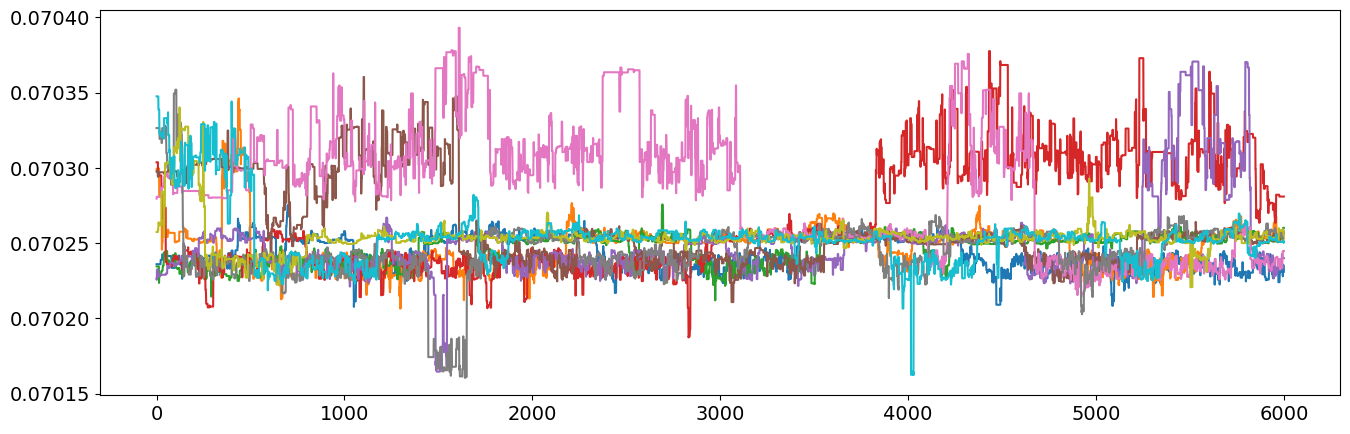

In [39]:
fig,ax = plt.subplots(1,1,figsize=(16,5))
#for i in range(np.shape(samples_w)[1]):
for i in range(10):
    ax.plot(samples_w[:,i,5])

### Corner

In [19]:
units = np.asarray([1,1,1,1e4,180/np.pi,180/np.pi])
samples_units = np.transpose(np.diag(units) @ np.transpose(samples))
p_out_units = np.asarray([np.percentile(samples_units[:,i],[1,16,50,84,99]) for i in range(np.shape(samples_units)[1])])

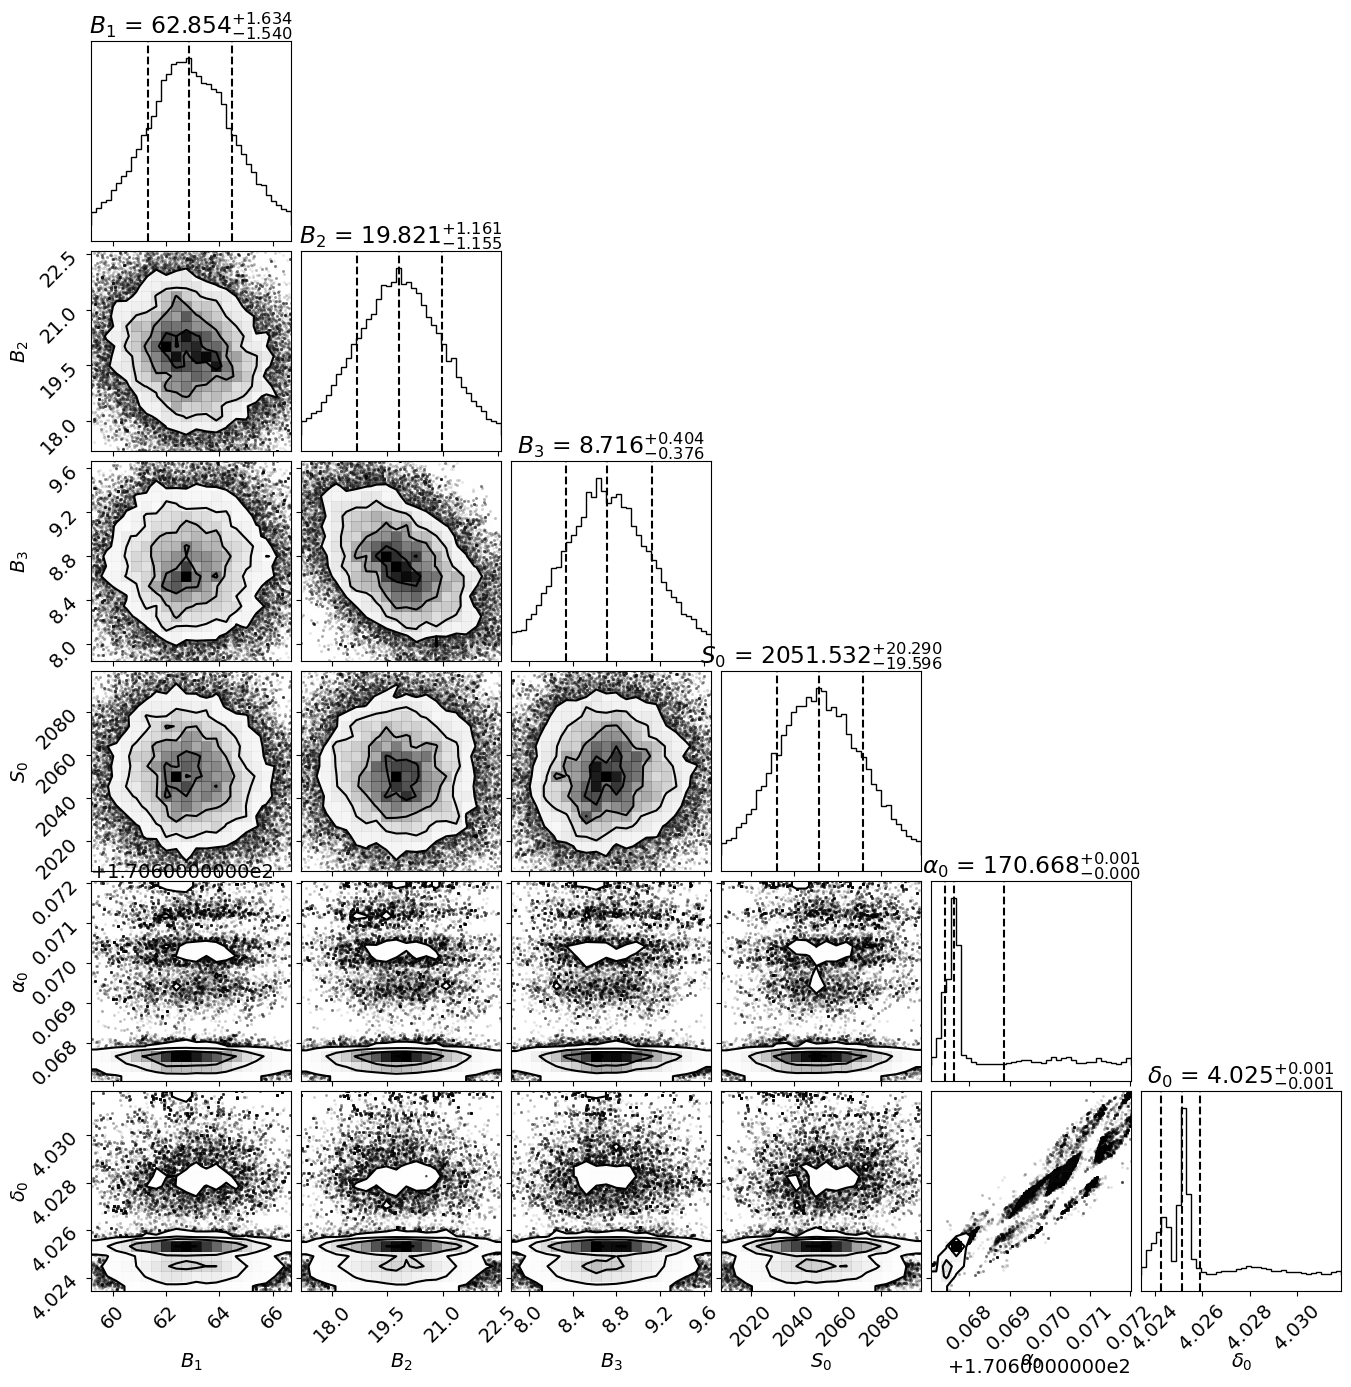

In [21]:
labels = [r'$B_1$',r'$B_2$',r'$B_3$',r'$S_0$',r'$\alpha_0$',r'$\delta_0$']
corner.corner(samples_units[:],
              labels=labels,show_titles=True,title_fmt='.3f',
              scale_hist=True,hist_bin_factor=2,range=p_out_units[:,[0,-1]],
              top_ticks=False,quantiles=[0.16,0.5,0.84],verbose=False);

### Spectra

In [23]:
counts_sig = S0_fit * eps * T_flux_template(t,ra,dec,ra_sun_0,dec_sun_0,delta_ra_sun,delta_dec_sun,t_min,duration)*np.exp(-(E-m/2)**2/(2*sigma_E**2)) / np.sqrt(2 * np.pi * sigma_E**2)

In [24]:
E_bin_size_1 = 0.04;
bins_E_hist_0 = np.logspace(np.log10(3),np.log10(200),150)
bins_E_hist_1 = np.arange(1.98-E_bin_size_1,220+E_bin_size_1,E_bin_size_1)

counts_hist_B1_0 = B1_fit * int_rate_aCXB_bg(bins_E_hist_0[:-1]) * exposure * (bins_E_hist_0[1:] - bins_E_hist_0[:-1])
counts_hist_B2_0 = B2_fit * int_rate_internal_bg(bins_E_hist_0[:-1]) * exposure * (bins_E_hist_0[1:] - bins_E_hist_0[:-1])
counts_hist_B3_0 = B3_fit * int_rate_continuum_bg(bins_E_hist_0[:-1]) * exposure * (bins_E_hist_0[1:] - bins_E_hist_0[:-1])

counts_hist_B1_1 = B1_fit * int_rate_aCXB_bg(bins_E_hist_1[:-1]) * exposure * (bins_E_hist_1[1:] - bins_E_hist_1[:-1])
counts_hist_B2_1 = B2_fit * int_rate_internal_bg(bins_E_hist_1[:-1]) * exposure * (bins_E_hist_1[1:] - bins_E_hist_1[:-1])
counts_hist_B3_1 = B3_fit * int_rate_continuum_bg(bins_E_hist_1[:-1]) * exposure * (bins_E_hist_1[1:] - bins_E_hist_1[:-1])

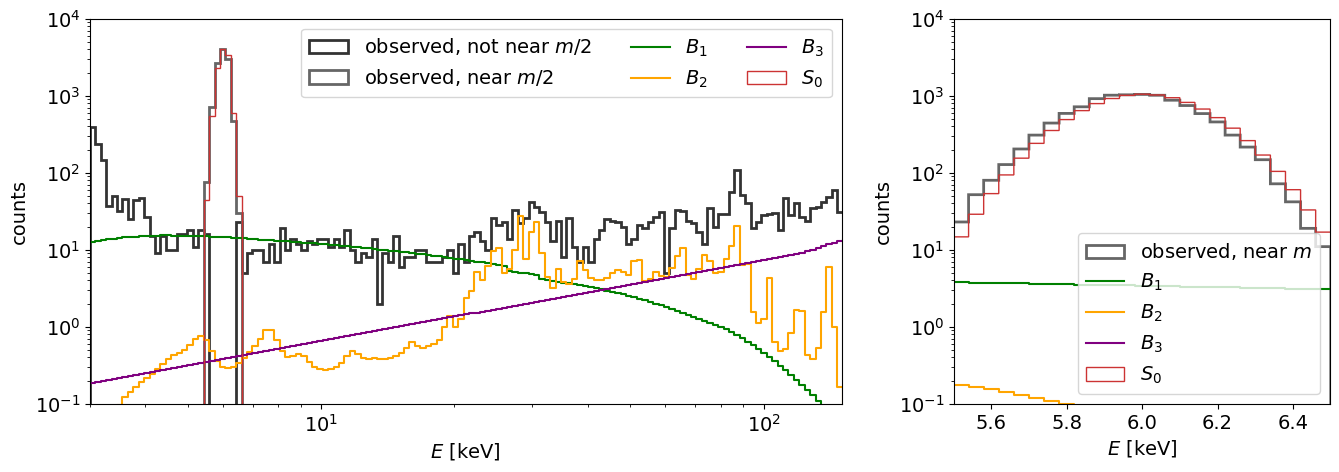

In [27]:
fig,ax = plt.subplots(1,2,gridspec_kw={'width_ratios':[2,1]},figsize=(16,5))
ax[0].hist(E_not_m,weights=counts_not_m,bins=bins_E_hist_0,histtype='step',color=(0.2,0.2,0.2),label=r'observed, not near $m/2$',lw=2);
ax[0].hist(E,weights=counts,bins=bins_E_hist_0,histtype='step',color=(0.4,0.4,0.4),label=r'observed, near $m/2$',lw=2)
ax[0].step(bins_E_hist_0[:-1],counts_hist_B1_0,color='green',label=r'$B_1$')
ax[0].step(bins_E_hist_0[:-1],counts_hist_B2_0,color='orange',label=r'$B_2$')
ax[0].step(bins_E_hist_0[:-1],counts_hist_B3_0,color='purple',label=r'$B_3$')
ax[0].hist(E,weights=counts_sig,bins=bins_E_hist_0,histtype='step',color=(0.8,0.2,0.2),label=r'$S_0$')
ax[1].hist(E,weights=counts,bins=bins_E_hist_1,histtype='step',color=(0.4,0.4,0.4),label=r'observed, near $m$',lw=2)
ax[1].step(bins_E_hist_1[:-1],counts_hist_B1_1,color='green',label=r'$B_1$')
ax[1].step(bins_E_hist_1[:-1],counts_hist_B2_1,color='orange',label=r'$B_2$')
ax[1].step(bins_E_hist_1[:-1],counts_hist_B3_1,color='purple',label=r'$B_3$')
ax[1].hist(E,weights=counts_sig,bins=bins_E_hist_1,histtype='step',color=(0.8,0.2,0.2),label=r'$S_0$')

ax[0].set_xlim(3,150)
ax[1].set_xlim(m/2-n_sigma_E*sigma_E,m/2+n_sigma_E*sigma_E)
ax[0].set_xscale('log'); ax[0].set_yscale('log'); 
ax[1].set_xscale('linear'); ax[1].set_yscale('log'); 
for i in range(2):
    ax[i].set_xlabel(r'$E~[\mathrm{keV}]$'); ax[i].set_ylabel(r'counts');
    ax[i].set_ylim(1e-1,1e4)
ax[0].legend(ncol=3,loc='upper right');
ax[1].legend(loc='lower right');

### Time dependence

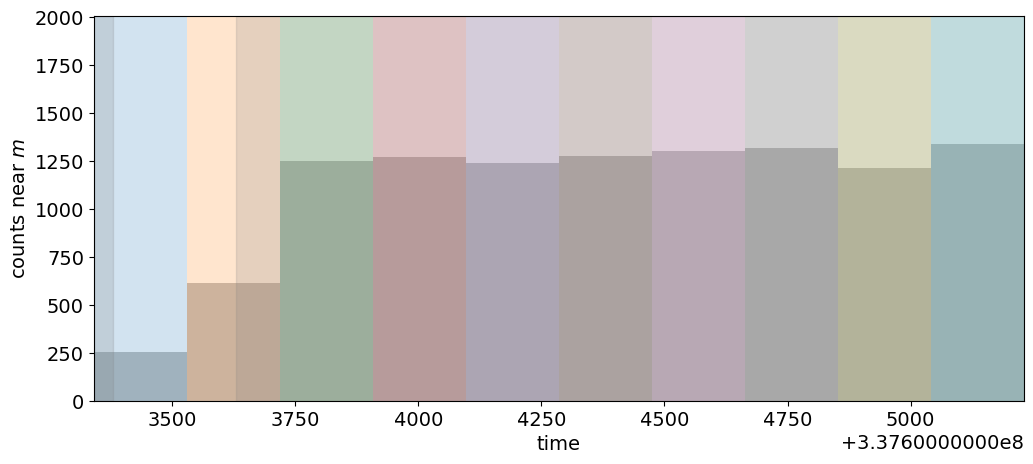

In [26]:
fig,ax = plt.subplots(1,1,figsize=(12,5))
h = ax.hist(t,bins=bins_t,weights=counts,color=(0.4,0.4,0.4),alpha=0.4)
counts_ref = 1.5 * np.max(h[0])
for i in range(len(bins_t)-1):
    ax.fill_between(bins_t[i:i+2],counts_ref,alpha=0.2)
for i in range(len(good_time_ints)):
    ax.fill_between(good_time_ints[i],counts_ref,alpha=0.2,color=(0.5,0.5,0.5))
ax.set_ylim(0,counts_ref);
ax.set_xlim(bins_t[0],bins_t[-1]);
ax.set_ylabel(r'counts near $m$');
ax.set_xlabel(r'time');

## Limit

In [85]:
cdf_samples = stats.cumfreq(samples[:,3],numbins=10**6)

In [86]:
S0_cdf_array = cdf_samples.lowerlimit + np.linspace(0, cdf_samples.binsize*cdf_samples.cumcount.size,cdf_samples.cumcount.size)
S0_cdf_array

array([0.19675953, 0.19675955, 0.19675957, ..., 0.21354441, 0.21354443,
       0.21354445])

In [87]:
cdf_S0_interpolation = interp1d(S0_cdf_array,cdf_samples.cumcount/samples_units.shape[0],bounds_error=False,fill_value=(1e-20,1))

In [94]:
def fun_intersect_unconstrained(S0,alpha=0.1):
    return (1-cdf_S0_interpolation(S0))-alpha

def fun_intersect_CLs(S0,alpha=0.1):
    return (1-cdf_S0_interpolation(S0))/(1-cdf_S0_interpolation(0))-alpha

In [98]:
S0_lim_unconstrained = optimize.brentq(fun_intersect_unconstrained,S0_cdf_array[0],S0_cdf_array[-1])
S0_lim_CLs = optimize.brentq(fun_intersect_unconstrained,S0_cdf_array[0],S0_cdf_array[-1])

In [124]:
h3 = ax[1].axvline(df_results['S_0_lim_yellin'][idx_m],color='orange')

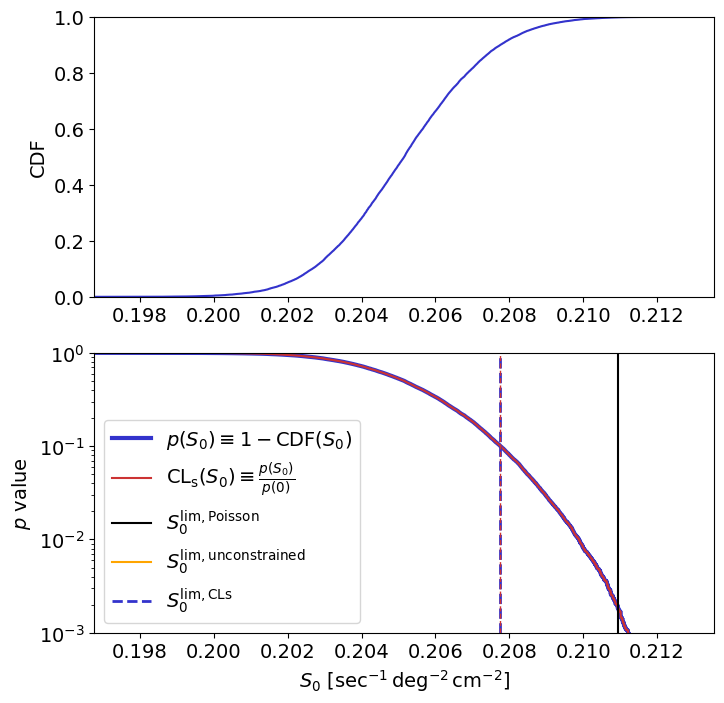

In [123]:
fig,ax = plt.subplots(2,1,figsize=(8,8))
ax[0].set_xlim(S0_cdf_array[0],S0_cdf_array[-1])
ax[0].set_ylim(0,1);
ax[0].plot(S0_cdf_array,cdf_S0_interpolation(S0_cdf_array),color=(0.2,0.2,0.8))
ax[0].set_ylabel('CDF');
ax[1].set_xlim(S0_cdf_array[0],S0_cdf_array[-1])
ax[1].set_ylim(1e-3,1); ax[1].set_yscale('log')
h0, = ax[1].plot(S0_cdf_array,1-cdf_S0_interpolation(S0_cdf_array),lw=3,color=(0.2,0.2,0.8))
h1, = ax[1].plot(S0_cdf_array,(1-cdf_S0_interpolation(S0_cdf_array))/(1-cdf_S0_interpolation(0)),lw=1.5,color=(0.8,0.2,0.2))
h2 = ax[1].axvline(df_results['S_0_lim_poisson'][idx_m],color=(0,0,0))
h3 = ax[1].axvline(df_results['S_0_lim_yellin'][idx_m],color='orange')
h4 = ax[1].axvline(S0_lim_unconstrained,ls='dashed',lw=2,color=(0.2,0.2,0.8))#,label=r'$S_0^{\text{lim,unconstrained}}$')
h5 = ax[1].axvline(S0_lim_CLs,ls='dashed',lw=1,color=(0.8,0.2,0.2))#label=r'$S_0^{\text{lim,CLs}}$')
ax[1].set_ylabel(r'$p$ value');
ax[1].set_xlabel(r'$S_0 ~[\mathrm{sec^{-1}\,deg^{-2}\,cm^{-2}}]$')
ax[1].legend([h0,h1,h2,h3,h4],[r'$p(S_0) \equiv 1-\mathrm{CDF}(S_0)$',r'$\mathrm{CL_s}(S_0) \equiv \frac{p(S_0)}{p(0)}$','$S_0^{\mathrm{lim,Poisson}}$',
                      '$S_0^{\mathrm{lim,unconstrained}}$','$S_0^{\mathrm{lim,CLs}}$']);

# ________________

In [355]:
res = stats.cumfreq(samples_units[:,3],numbins=10**6)

In [356]:
res

CumfreqResult(cumcount=array([1.0000e+00, 1.0000e+00, 1.0000e+00, ..., 3.1997e+04, 3.1997e+04,
       3.2000e+04]), lowerlimit=-2731.5778392796497, binsize=0.0072828954221222375, extrapoints=0)

In [370]:
x = res.lowerlimit + np.linspace(0, res.binsize*res.cumcount.size,res.cumcount.size)
x

array([-2731.57783928, -2731.57055638, -2731.56327347, ...,
        4551.30301704,  4551.31029994,  4551.31758284])

In [371]:
res_int = interp1d(x,res.cumcount/samples_units.shape[0])

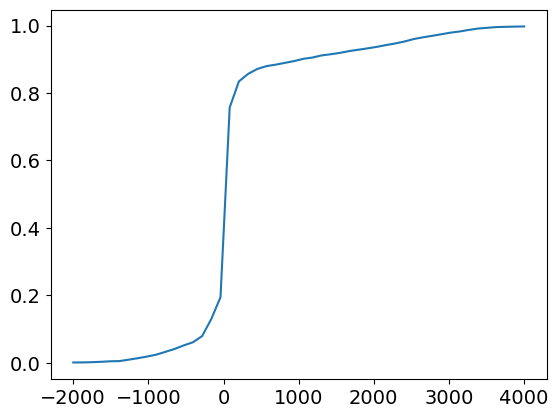

In [399]:
tmp_list = np.linspace(-2000,4000)
res_list = res_int(tmp_list)
plt.plot(tmp_list,res_list)

In [359]:
res.cumcount

array([1.0000e+00, 1.0000e+00, 1.0000e+00, ..., 3.1997e+04, 3.1997e+04,
       3.2000e+04])

In [408]:
np.max(samples_units[:,3])

4551.313941507701

In [401]:
def CLs_90p(S0):
    return ((1-res_int(S0))/res_int(0))-0.1

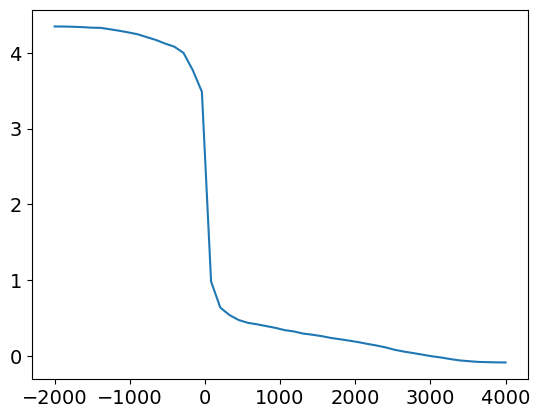

In [402]:
tmp_list = np.linspace(-2000,4000)
cls_list = CLs_90p(tmp_list)
plt.plot(tmp_list,cls_list)

In [409]:
upper_lim = optimize.brentq(CLs_90p, np.min(samples_units[:,3]), np.max(samples_units[:,3]))
print('Upper limit on S0 = ',upper_lim,r'$[10^{-4}\,\mathrm{deg^{-2}\,cm^{-2}\,s^{-1}\,keV^{-1}}]$')

Upper limit on S0 =  2966.10714255172 $[10^{-4}\,\mathrm{deg^{-2}\,cm^{-2}\,s^{-1}\,keV^{-1}}]$


In [410]:
(1-res_int(upper_lim))/res_int(0)

0.09999999999999674

# Results

In [404]:
results.append([m,upper_lim])

In [405]:
results

[[33.20000000000003, 17.757246823095834],
 [18.200000000000014, 4.117490622398918],
 [8.200000000000005, 2966.10714255172]]

In [388]:
# mass of 8.20 keV didn't work

In [389]:
pwd

'C:\\Users\\shalm\\Dropbox\\LuminousBasin\\code\\Shalma code\\New Likelihood with Backgrounds\\New versions'